In [1]:
import pandas as pd
import numpy as np

In [ ]:
def load_data(split="train"):
    x_path = f"../dataset/{split}/X_{split}.txt"
    y_path = f"../dataset/{split}/y_{split}.txt"
    features_path = "../dataset/features.txt"

    features = pd.read_csv(features_path, sep='\s+', header=None)[1].tolist()

    df_x = pd.read_csv(x_path, sep='\s+', header=None)
    df_x.columns = features

    y = pd.read_csv(y_path, header=None)[0]

    return df_x, y

X_train, y_train = load_data("train")
X_test, y_test = load_data("test")


In [66]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


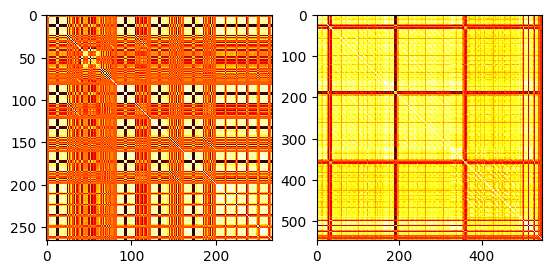

In [ ]:
import matplotlib.pyplot as plt
#266 end of timed features
features_path = "../dataset/features.txt"
features = pd.read_csv(features_path, sep='\s+', header=None)[1].tolist()
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(X_train[features[:266]].corr(), cmap='hot', interpolation='nearest')
axes[1].imshow(X_train[features[266:]].corr(), cmap='hot', interpolation='nearest')
plt.show()

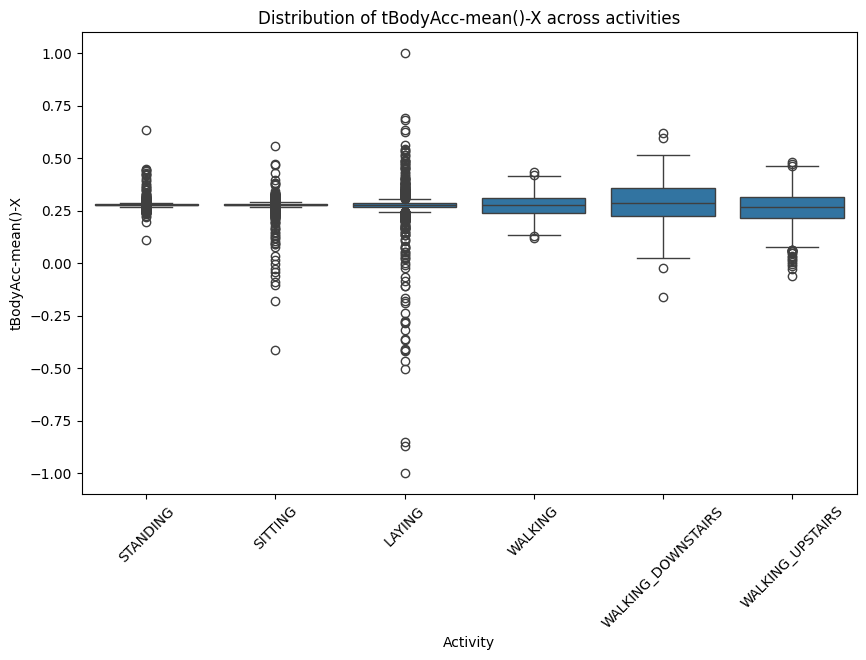

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = "tBodyAcc-mean()-X"

df = X_train.copy()
df["Activity"] = y_train.map({
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
})

plt.figure(figsize=(10,6))
sns.boxplot(x="Activity", y=feature, data=df)
plt.xticks(rotation=45)
plt.title(f"Distribution of {feature} across activities")
plt.show()


In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)


class disparity

In [153]:
y_train.value_counts()

0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

baseline

In [149]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=42)

In [150]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9930631120783461
0.9270444519850696


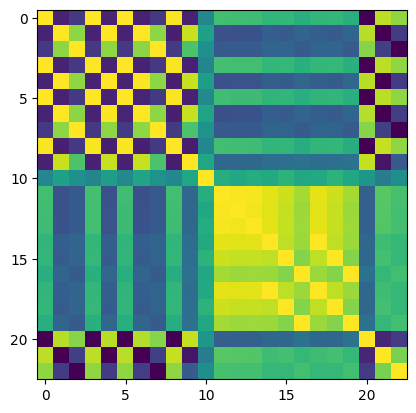

In [151]:
important_features = np.array(features)[clf.feature_importances_ > 1e-2]
plt.imshow(X_train[important_features].corr())

In [152]:
important_features

array(['tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y',
       'tGravityAcc-mean()-Z', 'tGravityAcc-max()-X',
       'tGravityAcc-max()-Y', 'tGravityAcc-min()-X',
       'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z',
       'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tBodyAccJerk-std()-X',
       'fBodyAcc-mad()-X', 'fBodyAccJerk-max()-X',
       'fBodyAccJerk-bandsEnergy()-1,16',
       'fBodyAccJerk-bandsEnergy()-1,16', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'], dtype='<U36')

In [161]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(x_train_s, y_train)
print(svc.score(x_train_s, y_train))
print(svc.score(x_test_s, y_test))


0.9866702937976061
0.9521547336274178


looks fine, run grid search

In [169]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','poly', 'rbf'), 'C':[1, 2, 4, 6, 10]}
svc = SVC(random_state=42)
clf = GridSearchCV(svc, parameters)
clf.fit(x_train_s, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.9359430624731198
{'C': 2, 'kernel': 'linear'}


In [170]:
svc = SVC(C=2.0, kernel='linear', random_state=42)
svc.fit(x_train_s, y_train)
print(svc.score(x_train_s, y_train))
print(svc.score(x_test_s, y_test))

0.9979597388465724
0.9599592806243638


## Work with raw data

derived from important features let us consider only accelerometer data

In [1]:
import pandas as pd
import numpy as np
def load_data(split="train"):
    x_path_x = f"../dataset/{split}/Inertial Signals/body_acc_x_{split}.txt"
    x_path_y = f"../dataset/{split}/Inertial Signals/body_acc_y_{split}.txt"
    x_path_z = f"../dataset/{split}/Inertial Signals/body_acc_z_{split}.txt"
    y_path = f"../dataset/{split}/y_{split}.txt"
    # features_path = "../dataset/features.txt"

    # features = pd.read_csv(features_path, sep='\s+', header=None)[1].tolist()

    df_x = pd.read_csv(x_path_x, sep='\s+', header=None)
    df_y = pd.read_csv(x_path_y, sep='\s+', header=None)
    df_z = pd.read_csv(x_path_z, sep='\s+', header=None)
    # df = pd.concat([df_x, df_y, df_z], axis=1)
    df = (df_x, df_y, df_z)
    y = pd.read_csv(y_path, header=None)[0]

    return df, y

X_train, y_train = load_data("train")
X_test, y_test = load_data("test")


replicate features

array(['tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y',
       'tGravityAcc-mean()-Z', 'tGravityAcc-max()-X',
       'tGravityAcc-max()-Y', 'tGravityAcc-min()-X',
       'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z',
       'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tBodyAccJerk-std()-X',
       'fBodyAcc-mad()-X', 'fBodyAccJerk-max()-X',
       'fBodyAccJerk-bandsEnergy()-1,16',
       'fBodyAccJerk-bandsEnergy()-1,16', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'], dtype='<U36')

In [4]:
import numpy as np
from scipy.signal import butter, filtfilt

def low_pass_filter(signal, cutoff=0.3, fs=50, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low')
    return filtfilt(b, a, signal)



def get_raw_data(df: pd.DataFrame):
    raw_data = pd.DataFrame()
    raw_data["tgravity"] = df.apply(lambda x: low_pass_filter(x.values), axis=1)
    raw_data["tbody"] = df.apply(lambda x: x.values, axis=1) - raw_data["tgravity"]
    return raw_data
data = get_raw_data(X_train[0])